# Singular Value Decomposition Example

This notebook is derived from [material](https://currents.soest.hawaii.edu/ocn_data_analysis/_static/eof.html) by Eric Firing at the University of Hawaii.

In [1]:
%matplotlib inline
import numpy as np
import scipy
import matplotlib.pyplot as plt

Make some fake data

In [2]:
nx = 4
nt = 100
t = np.linspace(0, 1, nt)
y1 = np.sin(t * (2 * np.pi / 0.1))
y2 = np.sin(t * (2 * np.pi / 0.3))

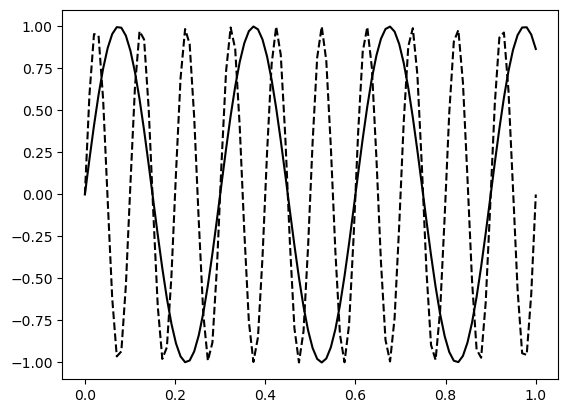

In [3]:
plt.plot(t,y1,'k--')
plt.plot(t,y2,'k')

In [4]:
dat0 = 0.7 * y1 + 0.7 * y2
dat1 = 0.5 * y1 + 0.6 * y2
dat2 = 0.25 * y1 + 0.8 * y2
dat3 = 0.1 * y1 + 1.0 * y2

dat = np.stack([dat0, dat1, dat2, dat3], axis=1)

# Save a copy of the pure signal.
signaldat = dat.copy()

#add noise
noisefac = 0.1
#np.random.seed(0) # make the "random" numbers repeatable
noise = noisefac * np.random.randn(nt, nx)
dat += noise

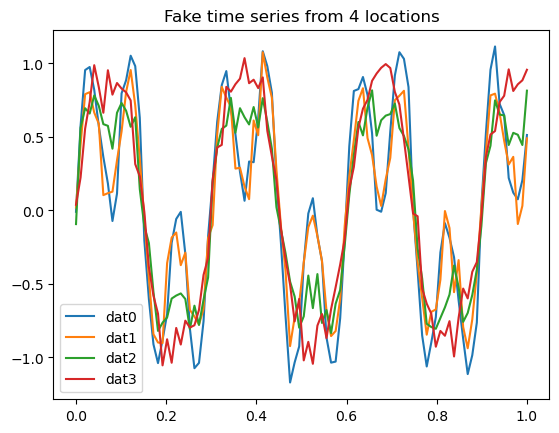

In [32]:

fig, ax = plt.subplots()
ax.plot(t, dat) # plot the 4 time series (columns)
ax.set_title("Fake time series from 4 locations")
ax.legend(["dat0", "dat1", "dat2", "dat3"]);

---
Compute SVD:

In [6]:
datmean = dat.mean(axis=0) # take the mean over time for each of the 4 locations
dat_dm = dat - datmean # subtract the mean from the dataset

In [7]:
# check the shape of our data matrix
dat_dm.shape

(100, 4)

We want our data matrix to have "space" (4) represented by each row, and "time" (100) represented by each column. This means we need to transpose the data matrix to get the shape (4, 100)

In [8]:
dat_transposed = dat_dm.T
dat_transposed.shape

(4, 100)

In [9]:
u, s, vt = scipy.linalg.svd(dat_transposed, full_matrices=False)

In [10]:
print(dat_dm.shape, u.shape, s.shape, vt.shape)

(100, 4) (4, 4) (4,) (4, 100)


---
Take a look at how SVD described our data in time (principal components)

In [11]:
# multipy S and Vt to get our PCs
PC = np.dot(vt.T, np.diag(s))

In [12]:
PC.shape

(100, 4)

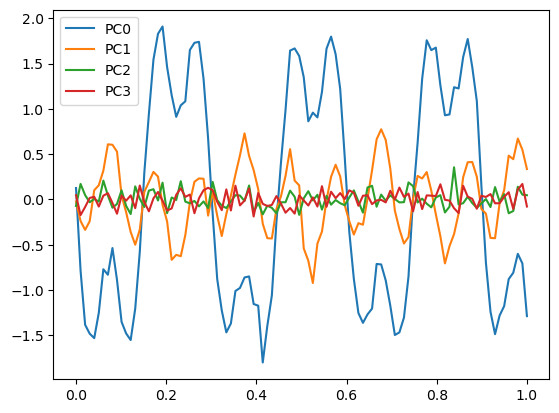

In [31]:
plt.figure()
plt.plot(t, PC)
plt.legend(["PC0", "PC1", "PC2", "PC3"]);

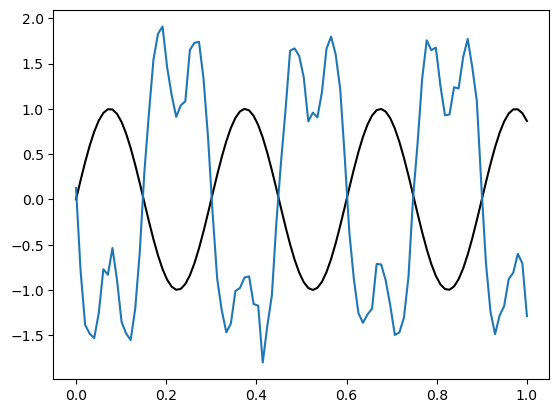

In [14]:
plt.plot(t,y2,'k')
plt.plot(t,PC[:,0])

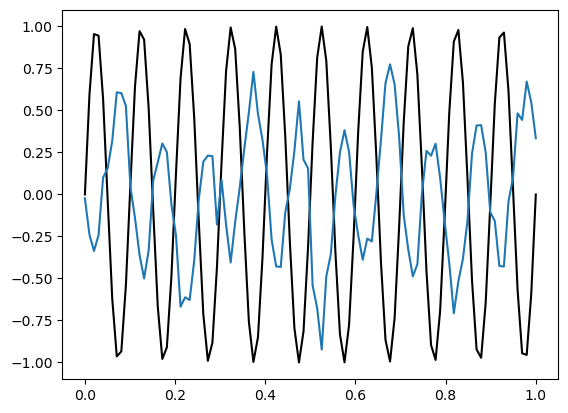

In [15]:
plt.plot(t,y1,'k-')
plt.plot(t,PC[:,1])

---
Take a look at how SVD described our data in space (EOFs)

In [16]:
# multipy S and U to get our EOFs
EOF = np.dot(u, np.diag(s))

In [17]:
EOF

array([[-6.43817415, -2.21793019,  0.3343119 ,  0.44395879],
       [-5.36539224, -1.44734492, -0.65576784, -0.40214476],
       [-5.74055018,  0.95292972,  0.57807328, -0.52831644],
       [-6.53165943,  2.53758686, -0.298908  ,  0.35706201]])

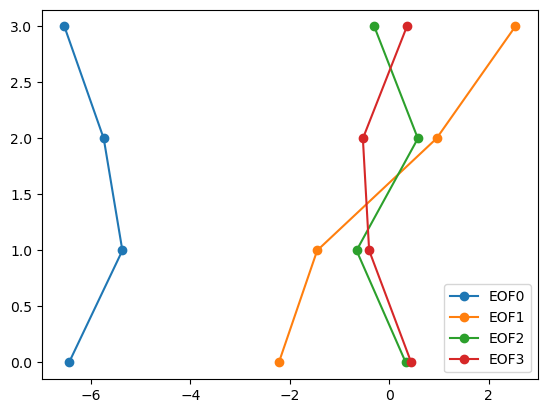

In [33]:
plt.plot(EOF,range(nx),'o-');
plt.legend(["EOF0", "EOF1", "EOF2", "EOF3"]);

---

How much variance does each singular value describe?

In [19]:
# SVD Variance Explained, divide S values by the sum of all S
var_exp = s / np.sum(s)

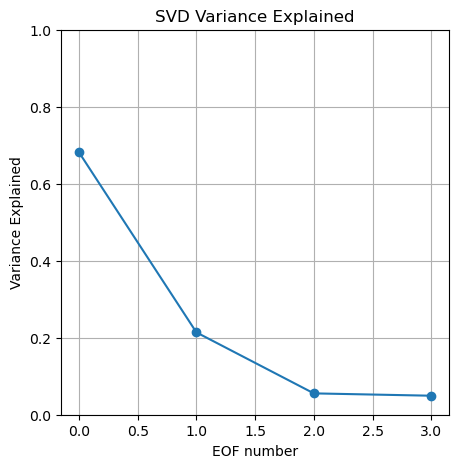

In [34]:
plt.figure(figsize=(5,5))
plt.plot(var_exp,'o-')
plt.xlabel('EOF number')
plt.ylabel('Variance Explained')
plt.title('SVD Variance Explained');
plt.ylim(0,1);
plt.grid('on');

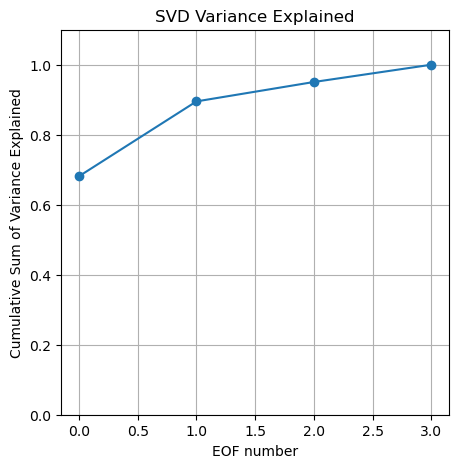

In [21]:
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(var_exp),'o-')
plt.xlabel('EOF number')
plt.ylabel('Cumulative Sum of Variance Explained')
plt.title('SVD Variance Explained');
plt.ylim(0,1.1);
plt.grid('on');

---
Reconstruct the data array

In [22]:
X = np.dot( np.dot(u, np.diag(s)), vt)

In [23]:
X.shape

(4, 100)

In [24]:
dat_reconstructed = X.T + datmean

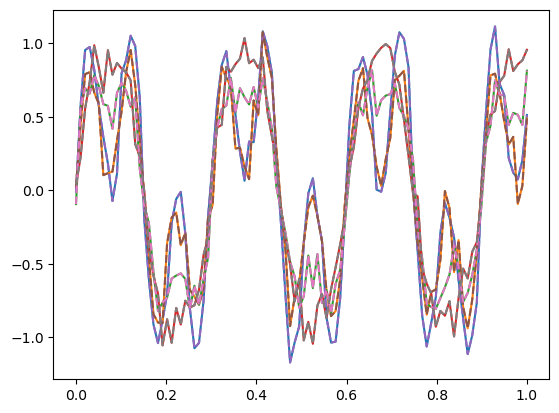

In [25]:
plt.plot(t, dat_reconstructed, linestyle='-');

plt.plot(t, dat, linestyle='--');

---

Reconstruct only using the first two EOFs and PCs (this represented about 90% of the total variance in the original data)

In [26]:
X2 = np.dot( np.dot(u[:,:2], np.diag(s[:2])), vt[:2,:])

In [27]:
X2.shape

(4, 100)

In [28]:
dat_reconstructed2 = X2.T + datmean

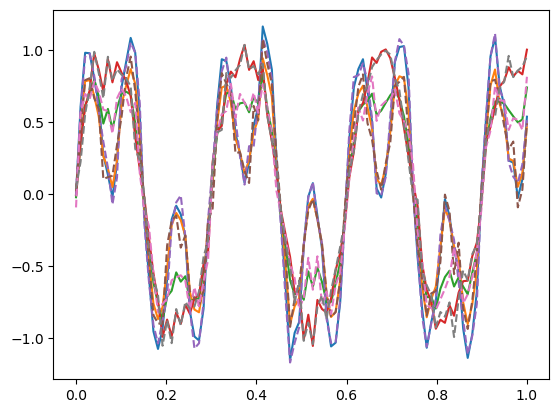

In [29]:
plt.plot(t, dat_reconstructed2);
plt.plot(t, dat, linestyle='--');

Plot differences to see the details we aren't capturing with just the first two EOFs

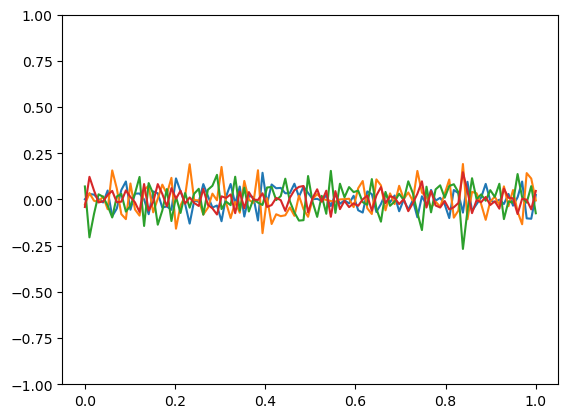

In [30]:
plt.plot(t, dat_reconstructed2 - dat);
plt.ylim(-1,1);